### Check Difference between Music and Speech

In [1]:
from IPython.core.display import display, HTML

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

Carrega as amostras para verificação do sinal, onde foram escolhidas músicas de 3 gêneros de maneira aleatória. Já para a fala foram escolhidas dois áudios em português e um terceiro é em inglês com um grito no meio.

In [2]:
FIG_SIZE = (20,25)
music_samples = ['./samples/music/blues/blues.00000.wav', './samples/music/pop/pop.00000.wav', './samples/music/rock/rock.00000.wav']
speech_samples = ['./samples/speechs/sample-0.wav', './samples/speechs/sample-1019.wav', './samples/speechs/sample-6729.wav']

music_sample1, sample_rate = librosa.load(music_samples[0], sr=22050)
music_sample2, sample_rate = librosa.load(music_samples[1], sr=22050)
music_sample3, sample_rate = librosa.load(music_samples[2], sr=22050)
speech_sample1, sample_rate = librosa.load(speech_samples[0], sr=22050)
speech_sample2, sample_rate = librosa.load(speech_samples[1], sr=22050)
speech_sample3, sample_rate = librosa.load(speech_samples[2], sr=22050)

Exibe como é o comportamento do sinal, para cada amostra escolhida.

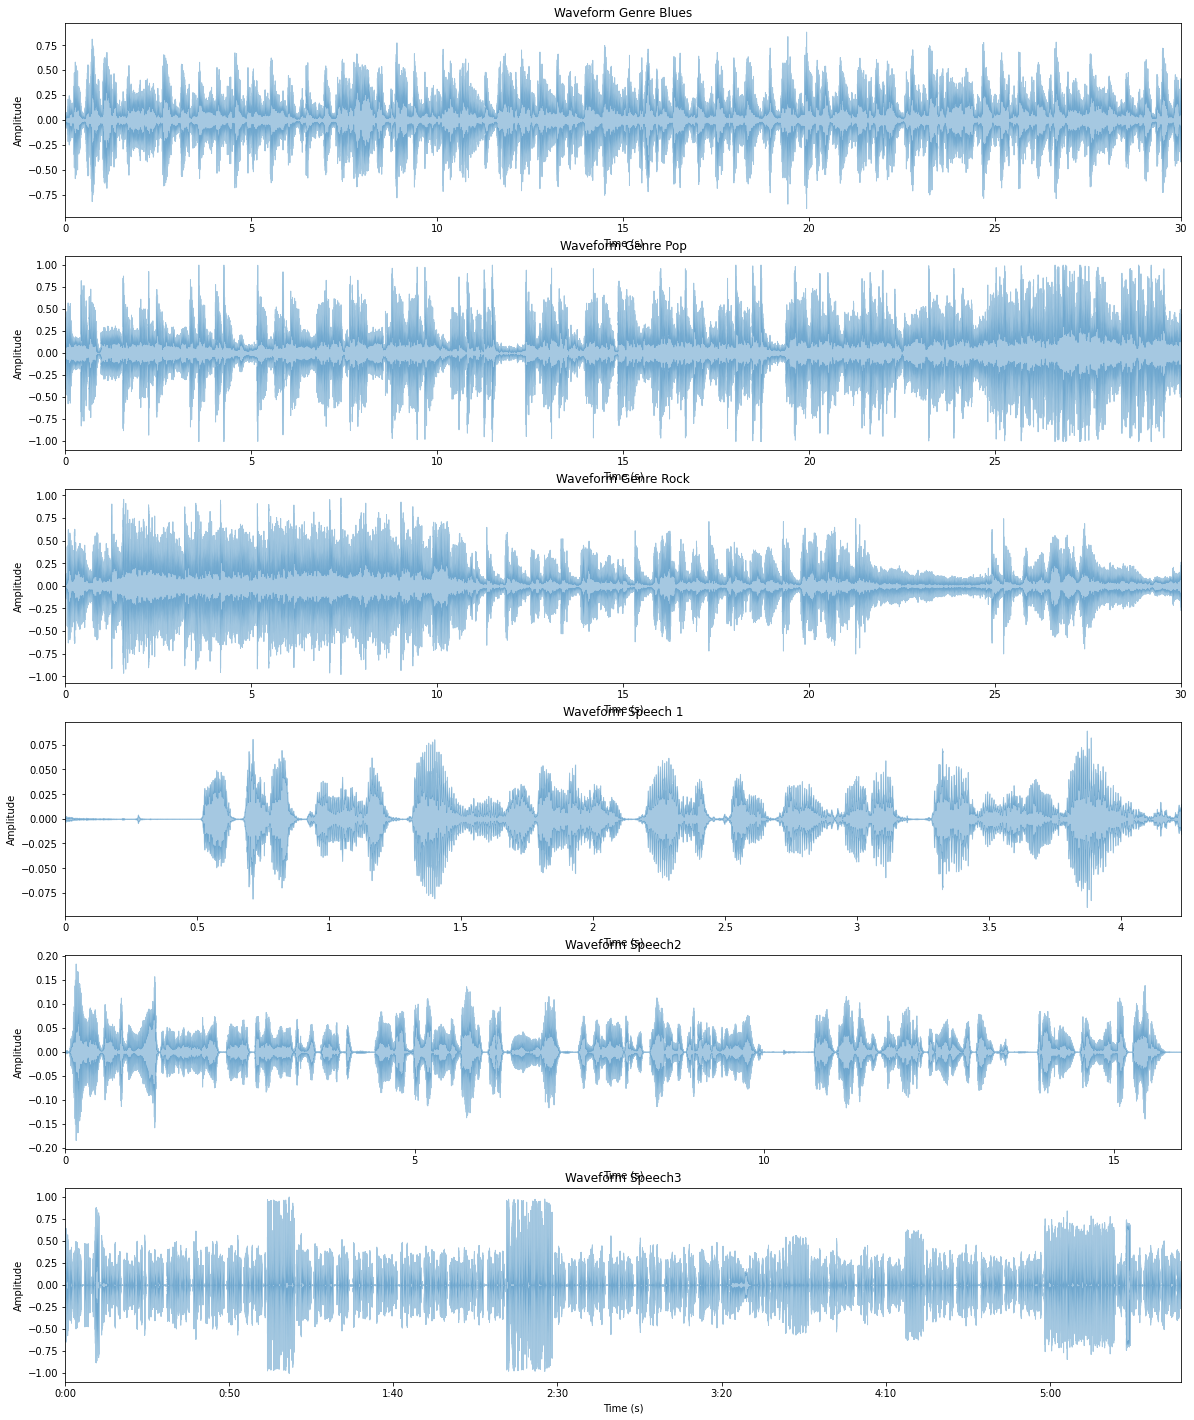

In [3]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
plt.subplot(6,1,1)
librosa.display.waveplot(music_sample1, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Genre Blues")
plt.subplot(6,1,2)
librosa.display.waveplot(music_sample2, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Genre Pop")
plt.subplot(6,1,3)
librosa.display.waveplot(music_sample3, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Genre Rock")
plt.subplot(6,1,4)
librosa.display.waveplot(speech_sample1, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Speech 1")
plt.subplot(6,1,5)
librosa.display.waveplot(speech_sample2, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Speech2")
plt.subplot(6,1,6)
librosa.display.waveplot(speech_sample3, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform Speech3")
plt.show()

A análise de Fourier converte um sinal do seu domínio original para uma representação no domínio da frequência e vice-versa. Uma Transformada rápida de Fourier calcula rapidamente essas transformações fatorizando a matriz da Transformada discreta de Fourier em um produto de fatores esparsos (principalmente zero).

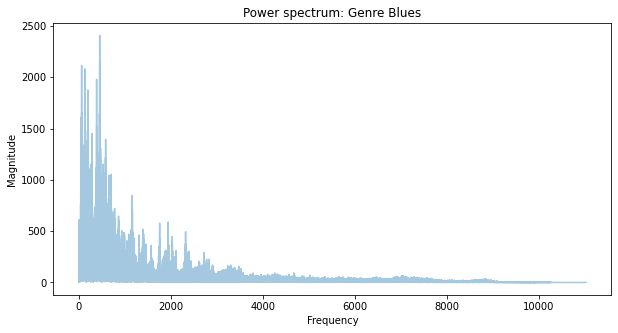

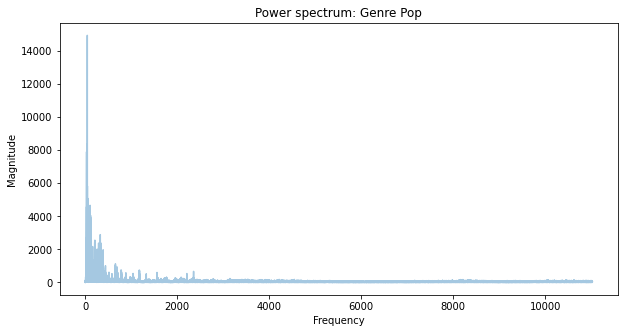

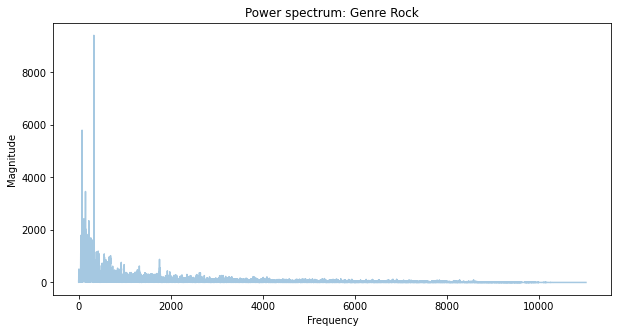

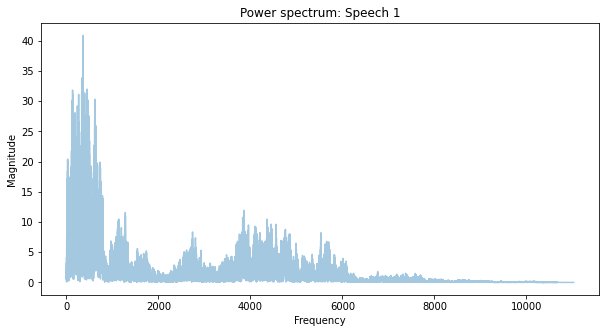

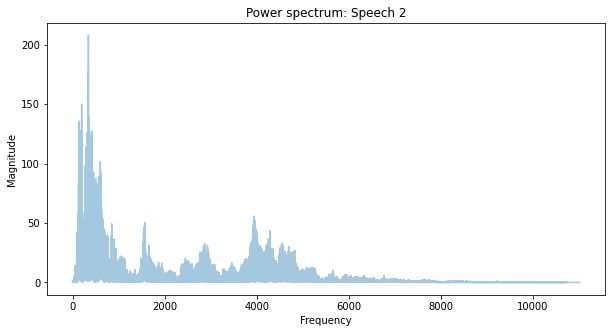

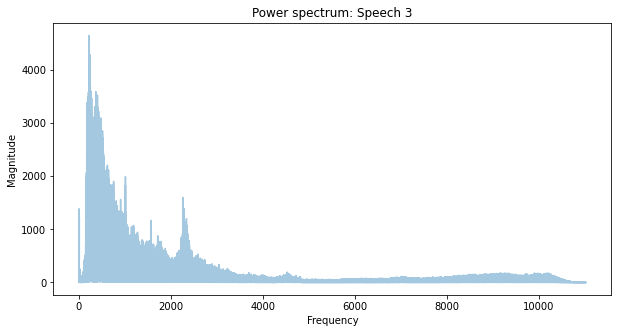

In [4]:
def run_fft(signal, sample_rate, title):
    fft = np.fft.fft(signal)
    spectrum = np.abs(fft)
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]
    plt.figure(figsize=(10,5))
    plt.plot(left_f, left_spectrum, alpha=0.4)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("Power spectrum: {}".format(title))
    plt.show()

run_fft(music_sample1, sample_rate, "Genre Blues")
run_fft(music_sample2, sample_rate, "Genre Pop")
run_fft(music_sample3, sample_rate, "Genre Rock")
run_fft(speech_sample1, sample_rate, "Speech 1")
run_fft(speech_sample2, sample_rate, "Speech 2")
run_fft(speech_sample3, sample_rate, "Speech 3")

Espectrogramas são gráficos que analisam dinamicamente a densidade espectral de energia. Os valores são indicados no plano tempo X frequência e poderiam ser traçados através de um gráfico de superfície, mas a forma usual para o espectrograma é planar: diferentes cores para indicar a intensidade da densidade espectral de energia, variando do violeta ao vermelho do espectro visível. 

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


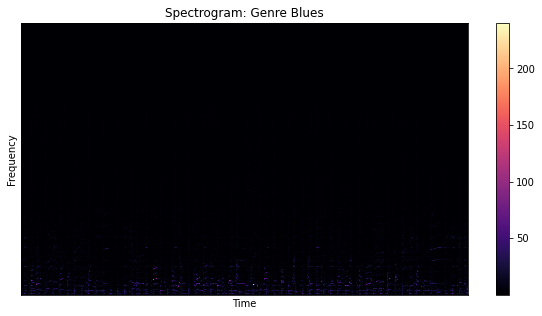

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


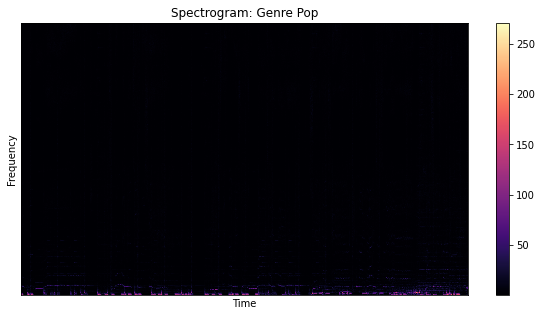

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


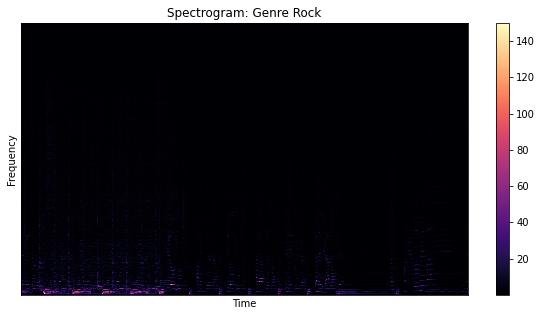

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


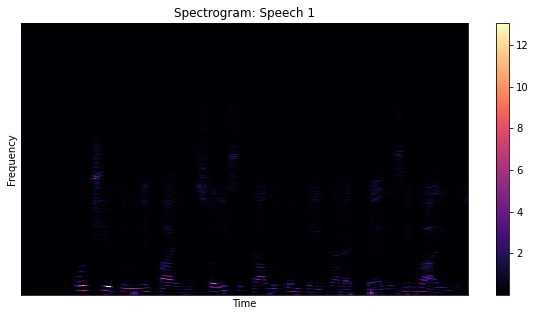

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


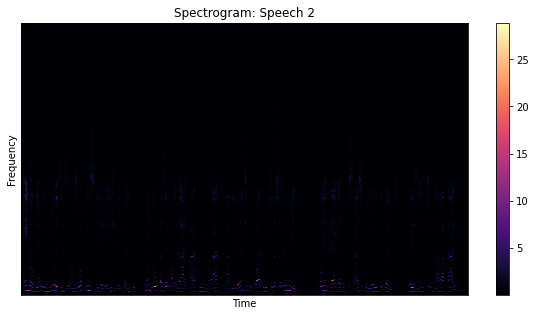

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


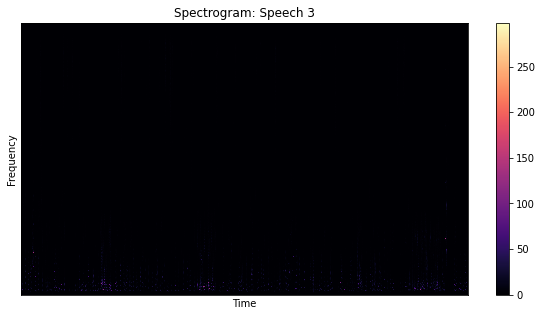

In [5]:
def calc_spectogram(signal, sample_rate, title):
    hop_length = 512
    n_fft = 2048

    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))
    
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.title("Spectrogram: {}".format(title))
    plt.show()
    
calc_spectogram(music_sample1, sample_rate, "Genre Blues")
calc_spectogram(music_sample2, sample_rate, "Genre Pop")
calc_spectogram(music_sample3, sample_rate, "Genre Rock")
calc_spectogram(speech_sample1, sample_rate, "Speech 1")
calc_spectogram(speech_sample2, sample_rate, "Speech 2")
calc_spectogram(speech_sample3, sample_rate, "Speech 3")

 Mas nessa etapa o espectograma foi cálculado considerando o log, dado que, a capacidade de audição humana não é linear.

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


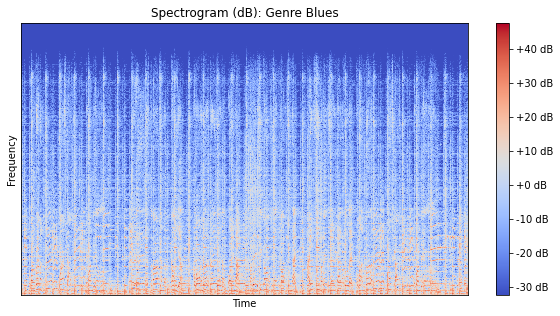

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


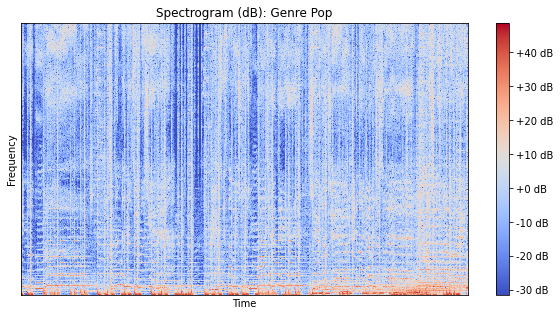

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


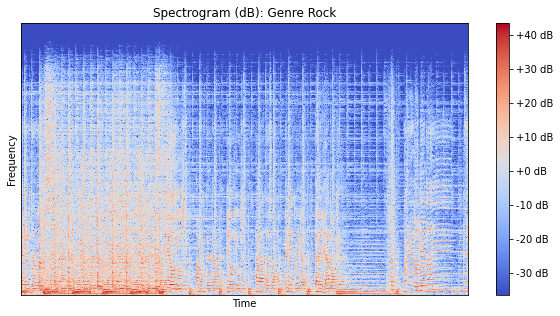

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


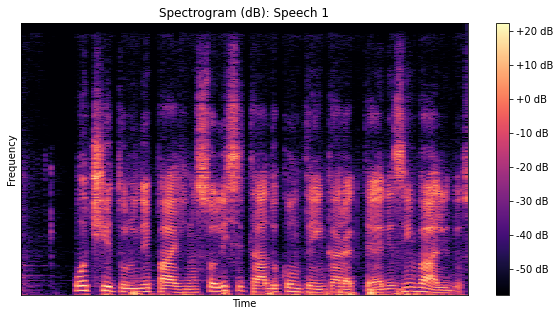

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


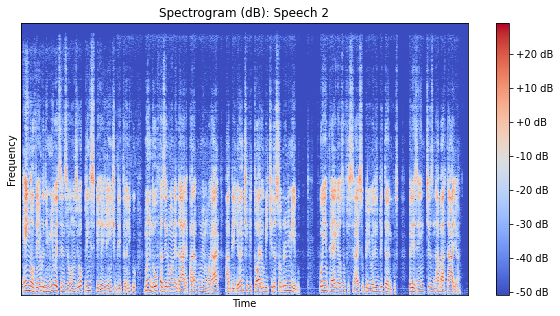

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


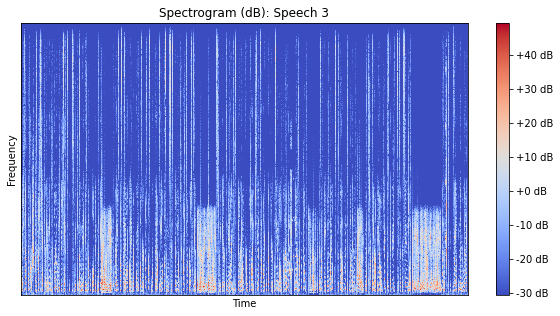

In [6]:
def calc_spectogram_and_apply_log(signal, sample_rate, title):
    hop_length = 512
    n_fft = 2048

    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))
    
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram (dB): {}".format(title))
    plt.show()

calc_spectogram_and_apply_log(music_sample1, sample_rate, "Genre Blues")
calc_spectogram_and_apply_log(music_sample2, sample_rate, "Genre Pop")
calc_spectogram_and_apply_log(music_sample3, sample_rate, "Genre Rock")
calc_spectogram_and_apply_log(speech_sample1, sample_rate, "Speech 1")
calc_spectogram_and_apply_log(speech_sample2, sample_rate, "Speech 2")
calc_spectogram_and_apply_log(speech_sample3, sample_rate, "Speech 3")

A técnica de extração de atributos Mel-Frequency Cepstral Coefficients (MFCC) faz uma análise de características espectrais de tempo curto, baseando-se no uso do espectro da voz convertido 
para uma escala de frequências denominada MEL que é uma escala que visa imitar as características únicas perceptíveis pelo ouvido humano.

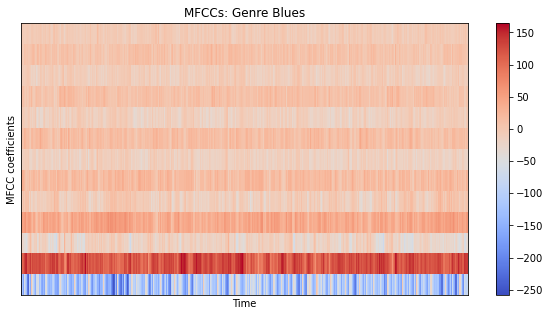

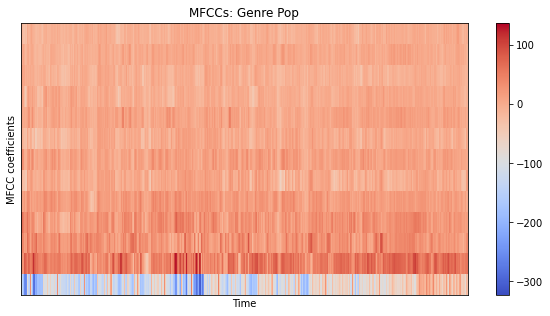

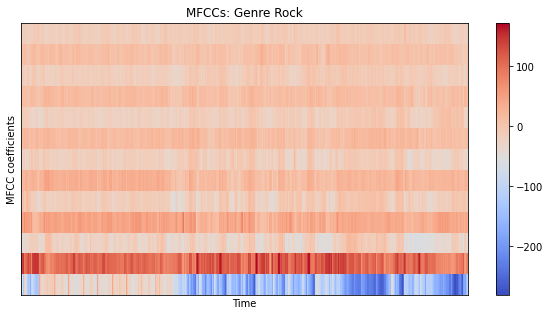

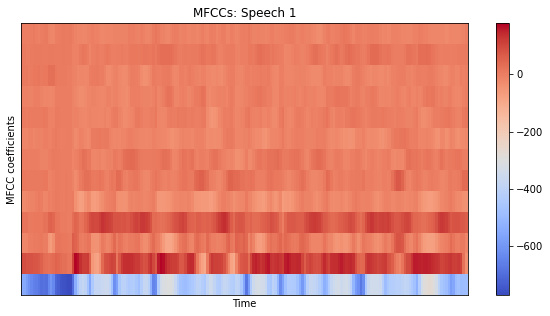

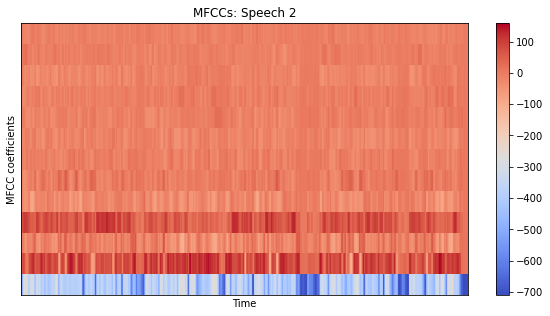

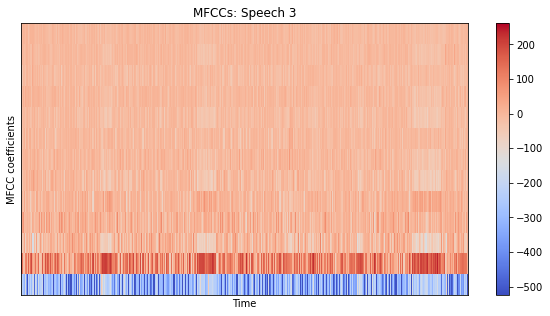

In [7]:
def run_mfcc(signal, sample_rate, title):
    hop_length = 512
    n_fft = 2048
    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

    plt.figure(figsize=(10,5))
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs: {}".format(title))

    plt.show()

run_mfcc(music_sample1, sample_rate, "Genre Blues")
run_mfcc(music_sample2, sample_rate, "Genre Pop")
run_mfcc(music_sample3, sample_rate, "Genre Rock")
run_mfcc(speech_sample1, sample_rate, "Speech 1")
run_mfcc(speech_sample2, sample_rate, "Speech 2")
run_mfcc(speech_sample3, sample_rate, "Speech 3")